### K-means clustering on image value and its spatial domain
### Name : Park Jinhyuk
### Student-ID : 20141775

In [47]:
import PIL.Image as pilimg
import matplotlib.pyplot as plt
import numpy as np
import random

file_data		= pilimg.open("building.jpg")
data			= np.array(file_data)
modifiedData			= np.array(file_data)

size_col	= len(data[0]) # height of the image
size_row  	= len(data)    # width of the image
size_rgb	= 3            # Red, Green, Blue

x_matrix = np.empty((size_row, size_col), dtype=float)
y_matrix = np.empty((size_row, size_col), dtype=float)

average = np.zeros(size_rgb, dtype = float)
deviation = np.zeros(size_rgb, dtype = float)

for i in range(0, size_row):
    for j in range(0, size_col):
        x_matrix[i][j] = j
        y_matrix[i][j] = i
        
for i in range(0, size_row):
    for j in range(0, size_col):
        average += data[i][j]
average = average / (size_row * size_col)

for i in range(0, size_row):
    for j in range(0, size_col):
        deviation += (data[i][j] - average) ** 2
deviation = np.sqrt(deviation / (size_row * size_col))


#
# linear scaling
#
for i in range(0, size_row):
    for j in range(0, size_col):
        x_matrix[i][j] /= size_col - 1
        y_matrix[i][j] /= size_row - 1
        
        
#
# image whitening
#
for i in range(0, size_row):
    for j in range(0, size_col):
        data[i][j] = abs((data[i][j] - average)) / deviation

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def l2_distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    #r = np.sqrt(s)

    return(s)

#
# example of distance function between two vectors x and y
#
def l1_distance(x, y):

    d = abs(x - y)
    s = np.sum(d)
    
    return(s)

### k = 3, a = 1

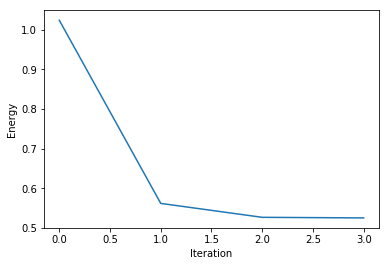

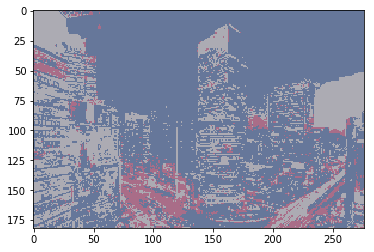

In [50]:
k = 3
a = 1
EnergyList = []

rgb_list_centroid = np.zeros((k, size_rgb), dtype=float)
rgb_list_count    = np.zeros(k)

x_list_centroid = np.zeros(k, dtype=float)
x_list_count    = np.zeros(k)
y_list_centroid = np.zeros(k, dtype=float)
y_list_count    = np.zeros(k)

list_label    = np.empty((size_row, size_col), dtype=int)

for i in range(size_row):
    for j in range(size_col):
        label       = random.randint(0, k - 1)
        list_label[i][j]       = label
        rgb_list_centroid[label, :]+= data[i][j]
        rgb_list_count[label]      += 1
        x_list_centroid[label]+= x_matrix[i][j]
        x_list_count[label]      += 1
        y_list_centroid[label]+= y_matrix[i][j]
        y_list_count[label]      += 1
        
for i in range(0, k):
    rgb_list_centroid[i, :] /= rgb_list_count[i]
    x_list_centroid[i] /= x_list_count[i]
    y_list_centroid[i] /= y_list_count[i]

    
while True:
    checkUpdate = 0
    Energy = 0
    for i in range(size_row):
        for j in range(size_col):
            label = list_label[i][j]
            min = (l2_distance(x_list_centroid[label], x_matrix[i][j]) + l2_distance(y_list_centroid[label], y_matrix[i][j])) * a + l2_distance(rgb_list_centroid[label, :], data[i][j])
            Energy += min
            for m in range(k):
                if m == label:
                    continue

                checkDistance = (l2_distance(x_list_centroid[m], x_matrix[i][j]) + l2_distance(y_list_centroid[m], y_matrix[i][j])) * a + l2_distance(rgb_list_centroid[m, :], data[i][j])
                if(min > checkDistance):
                    list_label[i][j] = m
                    min = checkDistance
                    checkUpdate += 1        
    Energy = Energy / (size_row * size_col)
    EnergyList.append(Energy)
                    
    if(checkUpdate == 0):
        break

    rgb_list_centroid = np.zeros((k, size_rgb), dtype=float)
    rgb_list_count = np.zeros(k)
    x_list_centroid = np.zeros(k, dtype=float)
    y_list_centroid = np.zeros(k, dtype=float)
    x_list_count = np.zeros(k)
    y_list_count = np.zeros(k)

    for i in range(size_row):
        for j in range(size_col):
            label = list_label[i][j]
            rgb_list_centroid[label, :] += data[i][j]
            rgb_list_count[label]       += 1
            x_list_centroid[label]  += x_matrix[i][j]
            y_list_centroid[label]  += y_matrix[i][j]
            x_list_count[label]     += 1
            y_list_count[label]     += 1

    for i in range(0, k):
        rgb_list_centroid[i, :] /= rgb_list_count[i]
        x_list_centroid[i]  /= x_list_count[i]
        y_list_centroid[i]  /= y_list_count[i]

        
#
# image reverse whitening
#
for i in range(0, k):
        rgb_list_centroid[i, :] = (rgb_list_centroid[i, :] * deviation) + average

        
# 
# plot image & energy
# 
x = np.arange(0, len(EnergyList), 1)
plt.plot(x, EnergyList)
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.show()

for i in range(size_row):
    for j in range(size_col):
        label      = list_label[i][j]
        modifiedData[i][j] = rgb_list_centroid[label, :]
plt.imshow(modifiedData)
plt.show()



### k = 3, a = 3

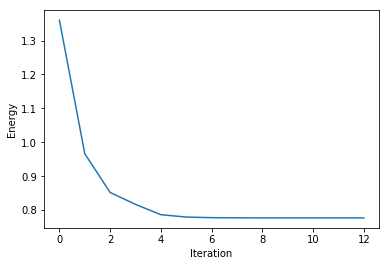

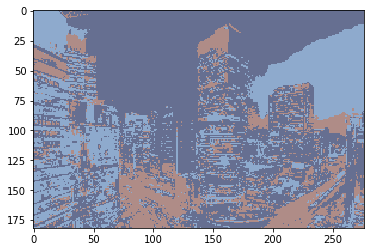

In [52]:
k = 3
a = 3
EnergyList = []

rgb_list_centroid = np.zeros((k, size_rgb), dtype=float)
rgb_list_count    = np.zeros(k)

x_list_centroid = np.zeros(k, dtype=float)
x_list_count    = np.zeros(k)
y_list_centroid = np.zeros(k, dtype=float)
y_list_count    = np.zeros(k)

list_label    = np.empty((size_row, size_col), dtype=int)

for i in range(size_row):
    for j in range(size_col):
        label       = random.randint(0, k - 1)
        list_label[i][j]       = label
        rgb_list_centroid[label, :]+= data[i][j]
        rgb_list_count[label]      += 1
        x_list_centroid[label]+= x_matrix[i][j]
        x_list_count[label]      += 1
        y_list_centroid[label]+= y_matrix[i][j]
        y_list_count[label]      += 1
        
for i in range(0, k):
    rgb_list_centroid[i, :] /= rgb_list_count[i]
    x_list_centroid[i] /= x_list_count[i]
    y_list_centroid[i] /= y_list_count[i]

    
while True:
    checkUpdate = 0
    Energy = 0
    for i in range(size_row):
        for j in range(size_col):
            label = list_label[i][j]
            min = (l2_distance(x_list_centroid[label], x_matrix[i][j]) + l2_distance(y_list_centroid[label], y_matrix[i][j])) * a + l2_distance(rgb_list_centroid[label, :], data[i][j])
            Energy += min
            for m in range(k):
                if m == label:
                    continue

                checkDistance = (l2_distance(x_list_centroid[m], x_matrix[i][j]) + l2_distance(y_list_centroid[m], y_matrix[i][j])) * a + l2_distance(rgb_list_centroid[m, :], data[i][j])
                if(min > checkDistance):
                    list_label[i][j] = m
                    min = checkDistance
                    checkUpdate += 1        
    Energy = Energy / (size_row * size_col)
    EnergyList.append(Energy)
                    
    if(checkUpdate == 0):
        break

    rgb_list_centroid = np.zeros((k, size_rgb), dtype=float)
    rgb_list_count = np.zeros(k)
    x_list_centroid = np.zeros(k, dtype=float)
    y_list_centroid = np.zeros(k, dtype=float)
    x_list_count = np.zeros(k)
    y_list_count = np.zeros(k)

    for i in range(size_row):
        for j in range(size_col):
            label = list_label[i][j]
            rgb_list_centroid[label, :] += data[i][j]
            rgb_list_count[label]       += 1
            x_list_centroid[label]  += x_matrix[i][j]
            y_list_centroid[label]  += y_matrix[i][j]
            x_list_count[label]     += 1
            y_list_count[label]     += 1

    for i in range(0, k):
        rgb_list_centroid[i, :] /= rgb_list_count[i]
        x_list_centroid[i]  /= x_list_count[i]
        y_list_centroid[i]  /= y_list_count[i]

        
#
# image reverse whitening
#
for i in range(0, k):
        rgb_list_centroid[i, :] = (rgb_list_centroid[i, :] * deviation) + average

        
# 
# plot image & energy
# 
x = np.arange(0, len(EnergyList), 1)
plt.plot(x, EnergyList)
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.show()

for i in range(size_row):
    for j in range(size_col):
        label      = list_label[i][j]
        modifiedData[i][j] = rgb_list_centroid[label, :]
plt.imshow(modifiedData)
plt.show()


### k = 3, a = 8

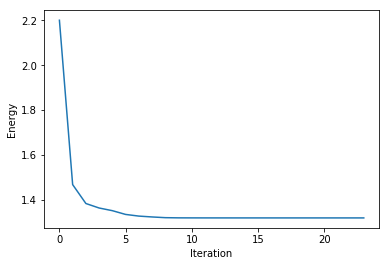

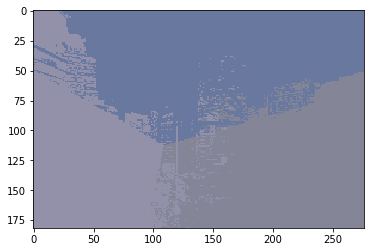

In [53]:
k = 3
a = 8
EnergyList = []

rgb_list_centroid = np.zeros((k, size_rgb), dtype=float)
rgb_list_count    = np.zeros(k)

x_list_centroid = np.zeros(k, dtype=float)
x_list_count    = np.zeros(k)
y_list_centroid = np.zeros(k, dtype=float)
y_list_count    = np.zeros(k)

list_label    = np.empty((size_row, size_col), dtype=int)

for i in range(size_row):
    for j in range(size_col):
        label       = random.randint(0, k - 1)
        list_label[i][j]       = label
        rgb_list_centroid[label, :]+= data[i][j]
        rgb_list_count[label]      += 1
        x_list_centroid[label]+= x_matrix[i][j]
        x_list_count[label]      += 1
        y_list_centroid[label]+= y_matrix[i][j]
        y_list_count[label]      += 1
        
for i in range(0, k):
    rgb_list_centroid[i, :] /= rgb_list_count[i]
    x_list_centroid[i] /= x_list_count[i]
    y_list_centroid[i] /= y_list_count[i]

    
while True:
    checkUpdate = 0
    Energy = 0
    for i in range(size_row):
        for j in range(size_col):
            label = list_label[i][j]
            min = (l2_distance(x_list_centroid[label], x_matrix[i][j]) + l2_distance(y_list_centroid[label], y_matrix[i][j])) * a + l2_distance(rgb_list_centroid[label, :], data[i][j])
            Energy += min
            for m in range(k):
                if m == label:
                    continue

                checkDistance = (l2_distance(x_list_centroid[m], x_matrix[i][j]) + l2_distance(y_list_centroid[m], y_matrix[i][j])) * a + l2_distance(rgb_list_centroid[m, :], data[i][j])
                if(min > checkDistance):
                    list_label[i][j] = m
                    min = checkDistance
                    checkUpdate += 1        
    Energy = Energy / (size_row * size_col)
    EnergyList.append(Energy)
                    
    if(checkUpdate == 0):
        break

    rgb_list_centroid = np.zeros((k, size_rgb), dtype=float)
    rgb_list_count = np.zeros(k)
    x_list_centroid = np.zeros(k, dtype=float)
    y_list_centroid = np.zeros(k, dtype=float)
    x_list_count = np.zeros(k)
    y_list_count = np.zeros(k)

    for i in range(size_row):
        for j in range(size_col):
            label = list_label[i][j]
            rgb_list_centroid[label, :] += data[i][j]
            rgb_list_count[label]       += 1
            x_list_centroid[label]  += x_matrix[i][j]
            y_list_centroid[label]  += y_matrix[i][j]
            x_list_count[label]     += 1
            y_list_count[label]     += 1

    for i in range(0, k):
        rgb_list_centroid[i, :] /= rgb_list_count[i]
        x_list_centroid[i]  /= x_list_count[i]
        y_list_centroid[i]  /= y_list_count[i]

        
#
# image reverse whitening
#
for i in range(0, k):
        rgb_list_centroid[i, :] = (rgb_list_centroid[i, :] * deviation) + average

        
# 
# plot image & energy
# 
x = np.arange(0, len(EnergyList), 1)
plt.plot(x, EnergyList)
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.show()

for i in range(size_row):
    for j in range(size_col):
        label      = list_label[i][j]
        modifiedData[i][j] = rgb_list_centroid[label, :]
plt.imshow(modifiedData)
plt.show()
